# Importing Packages


In [1]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential 
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from statsmodels import *
from tensorflow import keras

In [142]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Reading the Data

In [164]:
#Reading Data from 20 Machines
df1 = pd.read_csv("C:///machine_0.csv")
df2 = pd.read_csv("C:///machine_1.csv")
df3 = pd.read_csv("C:///machine_2.csv")
df4 = pd.read_csv("C:///machine_3.csv")
df5 = pd.read_csv("C:///machine_4.csv")
df6 = pd.read_csv("C:///machine_5.csv")
df7 = pd.read_csv("C:///machine_6.csv")
df8 = pd.read_csv("C:///machine_7.csv")
df9 = pd.read_csv("C:///machine_8.csv")
df10= pd.read_csv("C:///machine_9.csv")
df11= pd.read_csv("C:///machine_10.csv")
df12= pd.read_csv("C:///machine_11.csv")
df13= pd.read_csv("C:///machine_12.csv")
df14= pd.read_csv("C:///machine_13.csv")
df15= pd.read_csv("C:///machine_14.csv")
df16= pd.read_csv("C:///machine_15.csv")
df17= pd.read_csv("C:///machine_16.csv")
df18= pd.read_csv("C:///machine_17.csv")
df19= pd.read_csv("C:///machine_18.csv")
df20= pd.read_csv("C:///machine_19.csv")

# Exploratory Analysis on Machine 0

In [165]:
df=df1
df.head()

,Unnamed: 0,0,1,2,3
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561


In [131]:
df.shape

(3000, 5)

In [163]:
df.describe()

,0,1,2,3,outlier_count,0_zscore,1_zscore,2_zscore,3_zscore
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-0.816016,-1.091308,1.267945,0.165844,0.240000,-9.321247e-18,-3.620946e-17,-5.648260e-18,7.501812e-18
std,58.078319,55.965665,56.538700,56.910659,0.501149,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-323.954437,-258.780879,-287.153920,-365.362164,0.000000,-5.564767e+00,-4.605190e+00,-5.102168e+00,-6.423910e+00
25%,-0.008684,-0.008851,-0.008274,-0.007883,0.000000,1.390306e-02,1.934468e-02,-2.257626e-02,-3.053130e-03
50%,-0.000402,-0.000085,0.000669,0.000310,0.000000,1.404569e-02,1.950133e-02,-2.241805e-02,-2.909147e-03
75%,0.007832,0.008373,0.009056,0.008685,0.000000,1.418747e-02,1.965247e-02,-2.226968e-02,-2.761967e-03
max,315.738951,264.374782,281.684102,340.513819,3.000000,5.451393e+00,4.744165e+00,4.960547e+00,5.981388e+00


In [ ]:
#Machine 1 dataset
#df = pd.read_csv("C:///machine_3.csv")
df.head(3000)
df['Mode'].value_counts()

# Exploratory Data Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000261772E3700>],
      dtype=object)

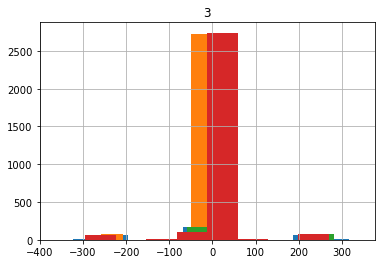

In [120]:
# Below Histogram shows how the 4 reading values of Machine0 distributed
fig, ax = plt.subplots()
df.hist(column=['0'], ax=ax)
df.hist(column=['1'], ax=ax)

df.hist(column=['2'], ax=ax)
df.hist(column=['3'], ax=ax)

In [144]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
dtype: object

In [ ]:
df.shape

In [125]:
# Check for null or missing values in the data of Machine 0
df.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
dtype: int64

# Labeling the modes of operation of Machines as 'Normal','Faulty' and Failure

In [166]:
# From the above EDA we can see that most of the outlier values are above 250 and below -250.
# So labeling those rows as Faulty and dropping them later part of code
# Readings greater than 1 and less than -1 as Normal reading ,rest is Failure
# where all the values drop to 0.
def fix_faulty(row):
    x = ['0','1','2','3']
    for i in x:
        if(row[i] >= 1 or row[i] <= -1):
            if(row[i] >= 250 or row[i] <= -250):
                return "Faulty"
            return "Normal"
        
        
        
    return "Failure"
            
df['Mode'] = df.apply(fix_faulty,axis=1)


In [148]:
# From the below output we can see that we have more failures in Machine 0 and 490 outlier rows and 373 normal readings
df['Mode'].value_counts()

Failure    2137
Faulty      490
Normal      373
Name: Mode, dtype: int64

In [153]:
# Analysing the faulty mode
df.loc[df['Mode'] == 'Faulty',:]

,0,1,2,3,Mode
10,274.010522,1.815051,19.832872,-260.793867,Faulty
31,269.832605,-0.662311,8.453306,12.566976,Faulty
44,-273.747803,-6.215151,23.815402,3.140229,Faulty
104,-284.380713,-6.062926,-12.738915,-3.983595,Faulty
116,271.527346,4.690857,16.690505,18.183480,Faulty
...,...,...,...,...,...
2968,-0.002507,0.008597,0.000209,250.003534,Faulty
2973,0.005659,0.004826,-0.004033,-250.011873,Faulty
2976,0.010039,0.019226,-0.003976,250.005539,Faulty
2982,250.000982,0.005630,250.002417,0.001535,Faulty


In [154]:
#Analysing the failure mode
df.loc[df['Mode']=='Failure',:]

,0,1,2,3,Mode
397,0.003946,0.009180,0.004883,0.010035,Failure
400,-0.006653,-0.003063,-0.004379,0.002276,Failure
401,-0.001126,0.012249,-0.001380,0.006800,Failure
402,-0.002541,0.018387,-0.011604,-0.004464,Failure
404,0.017978,0.001951,-0.001356,-0.008844,Failure
...,...,...,...,...,...
2995,0.004364,-0.010959,-0.007210,0.012390,Failure
2996,0.004077,0.000165,-0.003772,0.010053,Failure
2997,0.007702,-0.014708,-0.011722,0.001334,Failure
2998,-0.008149,0.000107,-0.017914,0.010599,Failure


## Outlier Detection

In [167]:
#Identify the columns which have outliers
from scipy.stats import iqr
range_map = {}
outlier_cols = []
for col in df.columns: #['0', '1', '2', '3']:
    if(df[col].dtype != "object"):
        #print(col)
        low = df[col].quantile(0.03)
        upp = df[col].quantile(0.97)
        range_map[col] = [low,upp]#,min(df[col]),max(df[col])]
        if(min(df[col]) < low or max(df[col]) > upp):
            outlier_cols.append(col)


In [168]:
def outlier_col_count(row):
    count = 0
    for col in outlier_cols:
        if(row[col] > range_map[col][1] or row[col] < range_map[col][0] ):
            count+=1
    return count
df['outlier_count'] = df.apply(outlier_col_count, axis=1)

In [169]:
outlier_cols = ['0', '1', '2', '3']

In [170]:
for col in outlier_cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [171]:
#Below we can see that there are no outliers in 2378 rows,1 outlier in 529 rows,2 ouliers in 88 and max 3 outlier in 5 rows
df.outlier_count.value_counts()

0    2378
1     529
2      88
3       5
Name: outlier_count, dtype: int64

In [172]:
df[outlier_cols].describe([0.01,0.02,.025,0.03,0.05,0.25,0.5,0.95,0.97,0.975,.978,0.98,0.99])

,0,1,2,3
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.816016,-1.091308,1.267945,0.165844
std,58.078319,55.965665,56.538700,56.910659
min,-323.954437,-258.780879,-287.153920,-365.362164
1%,-250.011256,-250.010251,-250.010651,-250.010674
2%,-250.003809,-250.003078,-250.001296,-250.002615
2.5%,-250.001123,-250.000540,-34.949158,-84.777372
3%,-53.373012,-20.684101,-27.943550,-47.247520
5%,-29.762912,-6.580519,-15.551948,-17.230534
25%,-0.008684,-0.008851,-0.008274,-0.007883


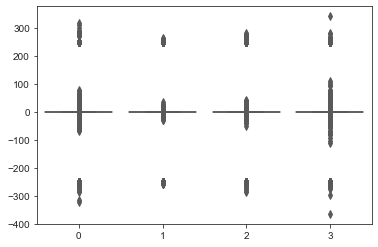

In [174]:
# Boxplot showing outliers in the Machine 0 readings
import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette("Reds")
ax = sns.boxplot(data=df[['0','1','2','3']], palette="Set2")

# Data Modeling

## To read data
## Fix data colum by trimming
## Assing Mode of operation (Normal or Faliure) , Faulty means outliers, just ignoring them
## Taking data sample till the first failure as the data after that is not required to analyse the faulty mode 
## Fixing target variable as 'Failure' mode represented by 1 and 0 for 'Normal' for the machines

In [33]:
def fix_date_df(df):
    df = df.rename(columns={"Unnamed: 0": "date"})
    df['date'] = pd.to_datetime(df['date'].astype(str).str[:-10])
    df['Mode'] = df.apply(fix_faulty,axis=1)
    df = df[df['Mode'] != 'Faulty']
    value = df.index[df['Mode'] == 'Failure'][0]
    df = df.loc[0:value]
    df = df.set_index('date') 
    df['target'] = df['Mode'].apply(lambda x: 0 if x=='Normal' else 1)
    #print(df.shape)

    return df

In [35]:
machines = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17]
machines_corrected = []
df = None
for idx,i in enumerate(machines):
    machines[idx] = fix_date_df(i)
    print(machines[idx].shape)
    if(df is None):
        df = machines[idx]
    else:
        df = pd.concat([machines[idx], df])
    

(374, 6)
(1647, 6)
(1789, 6)
(102, 6)
(62, 6)
(376, 6)
(594, 6)
(1387, 6)
(854, 6)
(713, 6)
(205, 6)
(255, 6)
(619, 6)
(569, 6)
(385, 6)
(1686, 6)
(564, 6)


In [38]:
df.head()

,0,1,2,3,Mode,target
date,,,,,,
2019-01-01 00:00:00,12.623363,8.820046,-11.808870,10.073501,Normal,0
2019-01-01 08:00:09,10.826310,2.784958,11.559553,21.897843,Normal,0
2019-01-01 16:00:19,21.095022,-0.630819,-17.840214,-1.345860,Normal,0
2019-01-02 00:00:28,32.312872,6.540248,-13.499914,-4.257744,Normal,0
2019-01-02 08:00:38,28.057312,253.690365,21.970890,13.635885,Normal,0


In [37]:
df.target.value_counts()

0    12164
1       17
Name: target, dtype: int64

In [ ]:
#Using TimeSeries generator to create input batches for LSTM Model
# Since there are 4 machine readings , I am trying to build 4 LSTM models, hence 4 generators will produce sequences

In [40]:
cols = ['0', '1', '2', '3']
n_input = 12
n_features = 1
stride = 1
g1 = g2 = g3= g4 = None
generators = [g1,g2,g3,g4]
for i, col in enumerate(cols):
    scaler = MinMaxScaler()
    df_temp = scaler.fit_transform(df[[col]])
    generators[i] = TimeseriesGenerator(df_temp,df['target'], stride = stride, length = n_input, batch_size = 4)

In [ ]:
#There are 4 LSTM models. Each tryting to predict if the next step is going to faulty or normal.

In [41]:
models = []
for g in generators:
    lstm_model = Sequential()
    lstm_model.add(LSTM(200, activation = 'relu',input_shape = (n_input,n_features)))
    lstm_model.add(Dense(1))
    loss_fn = keras.losses.BinaryCrossentropy()
    lstm_model.compile(optimizer='adam', loss = loss_fn)
    models.append(lstm_model)

In [44]:
%%time 
for i,model in enumerate(models):
    model.fit_generator(generators[0],epochs = 4)
    print("FINISHED---------{}----------".format(i))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/4
3043/3043 [==============================] - 49s 16ms/step - loss: 0.0216
Epoch 2/4
3043/3043 [==============================] - 48s 16ms/step - loss: 0.0215
Epoch 3/4
3043/3043 [==============================] - 46s 15ms/step - loss: 0.0215
Epoch 4/4
3043/3043 [==============================] - 48s 16ms/step - loss: 0.0215
FINISHED---------0----------
Epoch 1/4
3043/3043 [==============================] - 47s 15ms/step - loss: 0.0215
Epoch 2/4
3043/3043 [==============================] - 46s 15ms/step - loss: 0.0215
Epoch 3/4
3043/3043 [==============================] - 44s 14ms/step - loss: 0.0215
Epoch 4/4
3043/3043 [==============================] - 44s 14ms/step - loss: 0.0215
FINISHED---------1----------
Epoch 1/4
3043/3043 [==============================] - 48s 16ms/step - loss: 0.0216
Epoch 2/4
3043/3043 [==============================] - 46s 15ms/step - loss: 0.0215
Epoch 3/4
3043/3043 [=====

##  Inference

In [ ]:
#Using Machine 18,19,20 readings as test dataset.
# Trying to infer this from Models built previously 
#Values close 0 or 1 indicate failure.
#We can provide series of readings and predict if the machine is going towards failure.

In [45]:
df18 = fix_date_df(df18)
df19 = fix_date_df(df19)
df20 = fix_date_df(df20)

In [87]:
def scale_and_predict(df, start, end):
    scaler = MinMaxScaler()
    cols = ['0', '1', '2', '3']
    for i, col in enumerate(cols):
        scaled_data = scaler.fit_transform(df[[col]])
        batch = scaled_data[start:end]
        batch = batch.reshape(1,n_input,n_features)
        #print(batch)
        print(models[i].predict(batch)[0].reshape(1, -1))
        

In [88]:
scale_and_predict(df18,-13,-1)

[[-0.13491224]]
[[-0.17635855]]
[[-0.18854733]]
[[-0.1665728]]


In [89]:
scale_and_predict(df19,-13,-1)

[[-0.23634666]]
[[-0.15639655]]
[[-0.18010734]]
[[-0.18081202]]


In [90]:
scale_and_predict(df20,-13,-1)

[[-0.23860407]]
[[-0.15257825]]
[[-0.14108865]]
[[-0.15616053]]


In [73]:
scale_and_predict(df18,-14,-2)

[-0.13363977]
[-0.1755084]
[-0.18932869]
[-0.16336522]


In [54]:
generators[0][0]

(array([[[0.57435142],
         [0.56300837],
         [0.62782477],
         [0.69863216],
         [0.67177094],
         [0.68170221],
         [0.74014038],
         [0.7033451 ],
         [0.65370985],
         [0.68119094],
         [0.64620981],
         [0.55391699]],
 
        [[0.56300837],
         [0.62782477],
         [0.69863216],
         [0.67177094],
         [0.68170221],
         [0.74014038],
         [0.7033451 ],
         [0.65370985],
         [0.68119094],
         [0.64620981],
         [0.55391699],
         [0.5455378 ]],
 
        [[0.62782477],
         [0.69863216],
         [0.67177094],
         [0.68170221],
         [0.74014038],
         [0.7033451 ],
         [0.65370985],
         [0.68119094],
         [0.64620981],
         [0.55391699],
         [0.5455378 ],
         [0.52685007]],
 
        [[0.69863216],
         [0.67177094],
         [0.68170221],
         [0.74014038],
         [0.7033451 ],
         [0.65370985],
         [0.68119094],
  